In [31]:
# 使用前后睡眠时长变化柱状图

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import pandas as pd

In [33]:
# Set Chinese font
font_path = '../data/SimHei.ttf'  # Adjust as needed
font_prop = fm.FontProperties(fname=font_path)

In [34]:
# 姓名和使用前后睡眠时长
categories = ['陈东升', '费艳冬', '甘颖婷', '刘汪昊', '汤荀', '王瑜', '杨雅兰', '徐悦', '沈发琴', '郑慧', '藕有娣', '韩思洁', '俞志江', '沈士国', '从建明']
scores_right = np.array([8.5, 8, 3, 6, 3, 5.5, 5, 8.0, 8.2, 6.8, 7.2, 6, 5.7, 6, 7])
scores_left = np.array([8.43, 5.74, 6.7, 6.54, 4.27, 6.36, 5.91, 8.86, 8.39, 7.77, 7.43, 7.81, 7.99, 8, 7.36])
scores_right = np.flip(scores_right)
scores_left = np.flip(scores_left)

In [35]:
# 转换成dataframe，按照变化程度重新排序
df  = pd.DataFrame()
df['name'] = categories
df['right'] = scores_left
df['left'] = scores_right

df['change'] = df['right']-df['left']
df = df.sort_values(by='change',ascending=False)
categories = df['name']
scores_right = df['right']
scores_left = df['left']

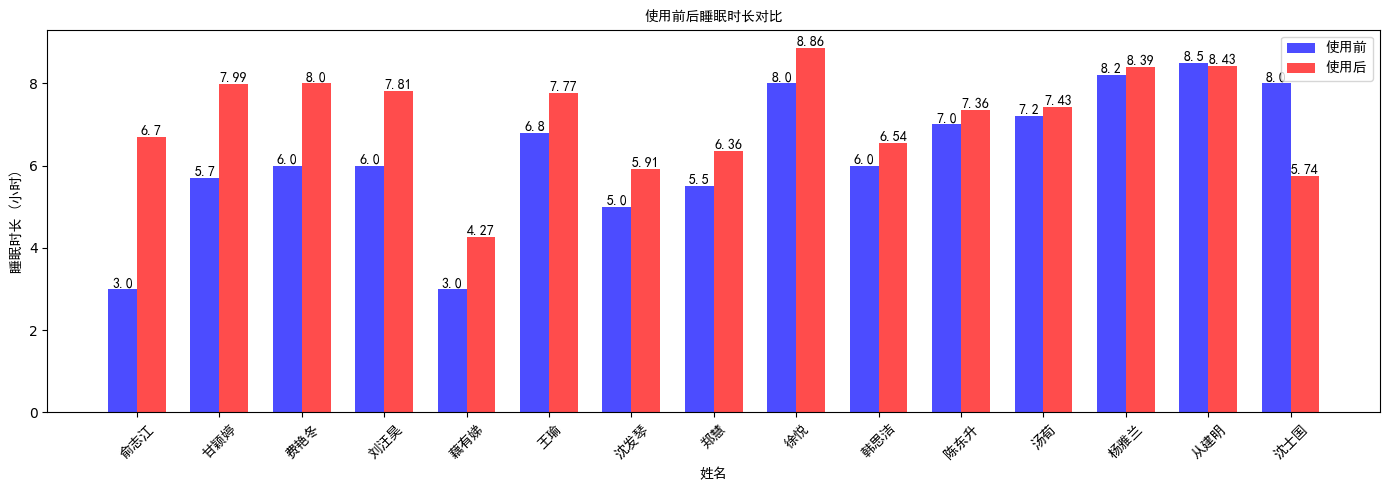

In [36]:
# 绘图
bar_width = 0.35
index = np.arange(len(categories))
plt.figure(figsize=(14, 5))

# 绘制柱子
bars_left = plt.bar(index, scores_left, bar_width, label='使用前', color='b', alpha=0.7)
bars_right = plt.bar(index + bar_width, scores_right, bar_width, label='使用后', color='r', alpha=0.7)

# 添加标签和标题
plt.xlabel('姓名', fontproperties=font_prop)
plt.ylabel('睡眠时长 (小时)', fontproperties=font_prop)
plt.title('使用前后睡眠时长对比', fontproperties=font_prop)
plt.xticks(index + bar_width / 2, categories, rotation=45, fontproperties=font_prop)
plt.legend(prop=font_prop)

# 在柱子上显示相应的数值
for bar in bars_left:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontproperties=font_prop)

for bar in bars_right:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontproperties=font_prop)

plt.tight_layout()
plt.savefig("../result/使用前后睡眠时长变化柱状图.png")
plt.show()
